In [9]:
from credit.data import get_forward_data
from glob import glob
import os
import xarray as xr
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from os.path import join

In [19]:
df.head()

,Unnamed: 0,acc_U_0,rmse_U_0,mse_U_0,mae_U_0,std_U_0,acc_U_1,rmse_U_1,mse_U_1,mae_U_1,...,rmse_LHFLX,mse_LHFLX,mae_LHFLX,std_LHFLX,acc,rmse,mse,mae,std,forecast_step
0,0.0,0.999357,1.464352,2.193467,1.095115,1.020389,0.999408,1.080014,1.200397,0.793307,...,214498.705729,4.640599e+10,137289.779080,0.177645,0.919767,14979.062609,7.756772e+09,8188.126356,0.273407,1.0
1,1.0,0.998491,2.231535,5.133898,1.654121,1.842473,0.998724,1.587868,2.603995,1.161379,...,275612.578125,7.667384e+10,178086.559028,78589.754774,0.915979,17023.368056,9.457078e+09,9300.660265,2269.669067,2.0
2,2.0,0.997580,2.822303,8.217243,2.098461,2.551399,0.998000,1.987985,4.093052,1.453270,...,333513.984375,1.115161e+11,215690.546007,154660.907986,0.911844,19170.900065,1.177744e+10,10442.001790,5195.427599,3.0
3,3.0,0.996591,3.338848,11.457913,2.488932,3.196986,0.997203,2.331225,5.632658,1.711095,...,335254.220486,1.130042e+11,230104.551215,230421.336806,0.907393,20044.278212,1.309380e+10,11261.503581,8472.737196,4.0
4,4.0,0.995301,3.921861,15.771516,2.931023,3.807637,0.996197,2.693227,7.502940,1.985254,...,391244.756944,1.538064e+11,266157.201389,310138.138889,0.902279,22852.962348,1.686955e+10,12778.444933,12567.961372,5.0


In [20]:
# all_files = sorted(glob('/glade/work/dkimpara/CREDIT_runs/latest_skebs/1979-01-01T00Z/*'))
# all_files = sorted(glob('/glade/work/dkimpara/CREDIT_runs/prescribed_skebs_rollout/one_percent_metrics/*'))
rollout_dir = "/glade/derecho/scratch/dkimpara/CREDIT_runs/skebs_diss_train"
all_files = glob(join(rollout_dir, "metrics/*.csv"))
print(all_files)
file = all_files[0]

df = pd.read_csv(file).drop(columns=["datetime"])

for file in all_files[1:]:
    df += pd.read_csv(file).drop(columns=["datetime"])

df = df / len(all_files)
forecast_day = df.forecast_step * 6 / 24

['/glade/derecho/scratch/dkimpara/CREDIT_runs/skebs_diss_train/metrics/2012-09-25T00Z.csv', '/glade/derecho/scratch/dkimpara/CREDIT_runs/skebs_diss_train/metrics/2013-01-31T00Z.csv', '/glade/derecho/scratch/dkimpara/CREDIT_runs/skebs_diss_train/metrics/2013-01-15T00Z.csv', '/glade/derecho/scratch/dkimpara/CREDIT_runs/skebs_diss_train/metrics/2012-10-27T00Z.csv', '/glade/derecho/scratch/dkimpara/CREDIT_runs/skebs_diss_train/metrics/2012-10-11T00Z.csv', '/glade/derecho/scratch/dkimpara/CREDIT_runs/skebs_diss_train/metrics/2012-08-08T00Z.csv', '/glade/derecho/scratch/dkimpara/CREDIT_runs/skebs_diss_train/metrics/2012-12-30T00Z.csv', '/glade/derecho/scratch/dkimpara/CREDIT_runs/skebs_diss_train/metrics/2012-06-21T00Z.csv', '/glade/derecho/scratch/dkimpara/CREDIT_runs/skebs_diss_train/metrics/2012-08-24T00Z.csv', '/glade/derecho/scratch/dkimpara/CREDIT_runs/skebs_diss_train/metrics/2012-12-14T00Z.csv', '/glade/derecho/scratch/dkimpara/CREDIT_runs/skebs_diss_train/metrics/2012-11-12T00Z.csv'

In [21]:
def plot(variable):
    plt.plot(forecast_day, df[f"std_{variable}"], label="std", c='tab:orange')
    plt.plot(forecast_day, df[f"rmse_{variable}"], label="rmse", c='b')
    plt.xlabel("Day")
    plt.title(f"{variable} Spread-Error")
    plt.legend()
    plt.xaxis.grid(True)

    plt.show()

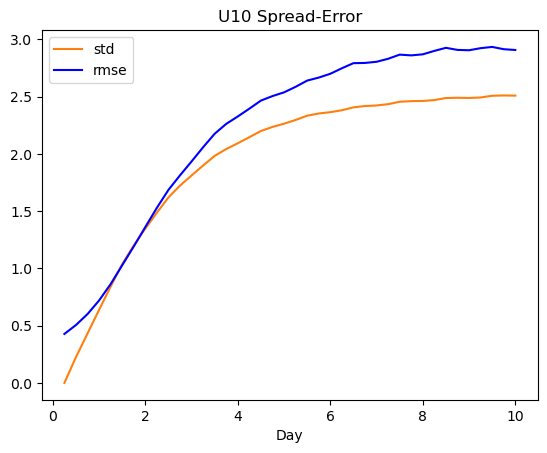

In [22]:
plot("U10")

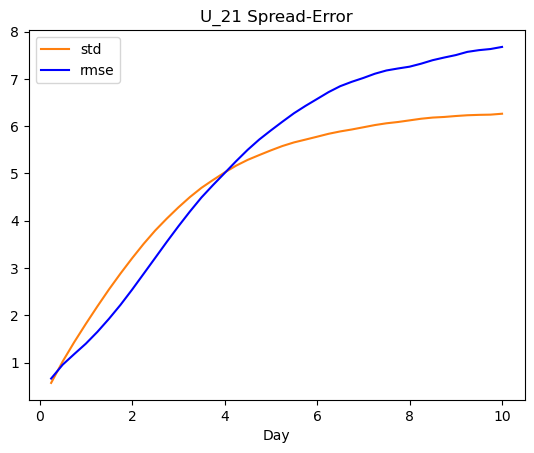

In [27]:
plot("U_21")

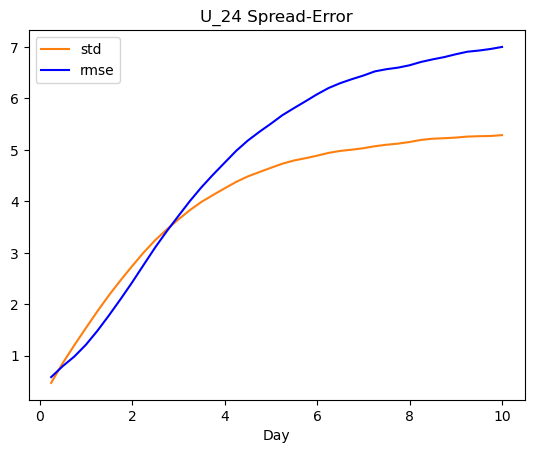

In [29]:
plot("U_24")

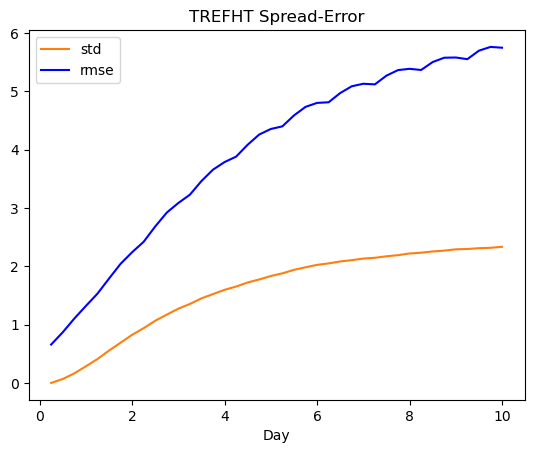

In [28]:
plot("TREFHT")

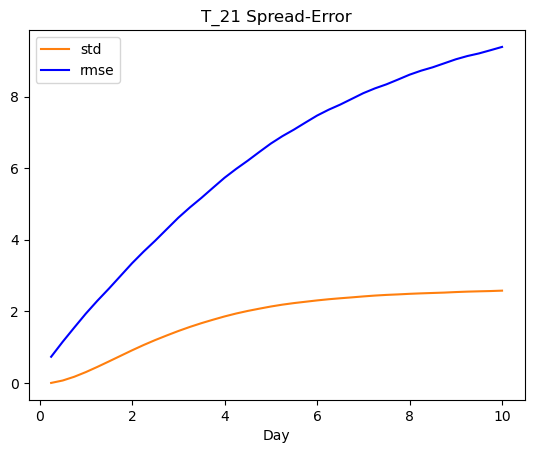

In [23]:
plot("T_21")

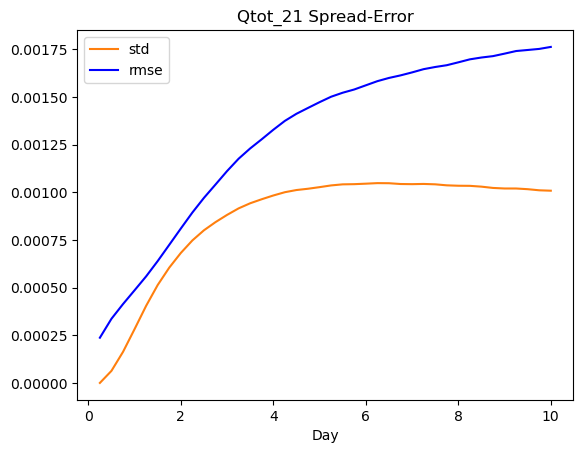

In [24]:
plot("Qtot_21")

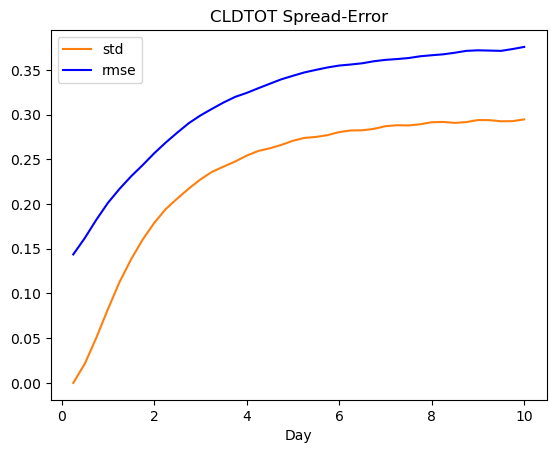

In [25]:
plot("CLDTOT")

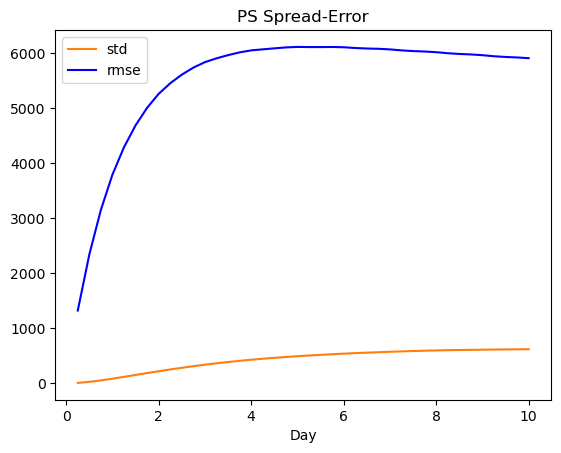

In [26]:
plot("PS")